In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path  = r'C:\Users\niles\Downloads\Compressed\ecommerce.csv'
df = pd.read_csv(path)
df.head()

,order_id,customer_id,category,product,price,quantity,order_date,status,payment_method
0,1,1100,Clothing,T-Shirt,928.00,3,2023-10-19,Returned,Credit Card
1,2,1003,Beauty,Perfume,173.62,5,2023-04-18,Delivered,Credit Card
2,3,1084,Home,Chair,838.27,2,2023-08-17,Returned,Debit Card
3,4,1012,Clothing,Jacket,119.68,1,2023-11-07,Returned,Net Banking
4,5,1030,Home,Chair,985.11,3,2023-04-13,Returned,Net Banking


In [2]:
df.isnull().sum()

order_id          0
customer_id       0
category          0
product           0
price             0
quantity          0
order_date        0
status            0
payment_method    0
dtype: int64

In [3]:
df.duplicated().sum()

0

**It's already a cleaned dataset.**

In [4]:
df.describe(include = 'all')

,order_id,customer_id,category,product,price,quantity,order_date,status,payment_method
count,150.000000,150.000000,150,150,150.000000,150.000000,150,150,150
unique,NaN,NaN,5,15,NaN,NaN,123,2,5
top,NaN,NaN,Home,Chair,NaN,NaN,2023-02-01,Returned,Cash on Delivery
freq,NaN,NaN,35,15,NaN,NaN,4,80,33
mean,75.500000,1050.126667,NaN,NaN,484.761000,3.080000,NaN,NaN,NaN
std,43.445368,30.011921,NaN,NaN,290.885065,1.358641,NaN,NaN,NaN
min,1.000000,1000.000000,NaN,NaN,36.380000,1.000000,NaN,NaN,NaN
25%,38.250000,1024.000000,NaN,NaN,214.835000,2.000000,NaN,NaN,NaN
50%,75.500000,1048.500000,NaN,NaN,478.650000,3.000000,NaN,NaN,NaN
75%,112.750000,1075.750000,NaN,NaN,731.192500,4.000000,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        150 non-null    int64  
 1   customer_id     150 non-null    int64  
 2   category        150 non-null    object 
 3   product         150 non-null    object 
 4   price           150 non-null    float64
 5   quantity        150 non-null    int64  
 6   order_date      150 non-null    object 
 7   status          150 non-null    object 
 8   payment_method  150 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 10.7+ KB


In [6]:
df.dtypes

order_id            int64
customer_id         int64
category           object
product            object
price             float64
quantity            int64
order_date         object
status             object
payment_method     object
dtype: object

In [7]:
df['order_date'] = pd.to_datetime(df['order_date'])
df.dtypes

order_id                   int64
customer_id                int64
category                  object
product                   object
price                    float64
quantity                   int64
order_date        datetime64[ns]
status                    object
payment_method            object
dtype: object

**Converted order_date from object to datetime.**

In [8]:
df['total_sales'] = df['price'] * df['quantity']
df['order_month'] = df['order_date'].dt.month
df['order_weekday']= df['order_date'].dt.weekday
df.head()

,order_id,customer_id,category,product,price,quantity,order_date,status,payment_method,total_sales,order_month,order_weekday
0,1,1100,Clothing,T-Shirt,928.00,3,2023-10-19,Returned,Credit Card,2784.00,10,3
1,2,1003,Beauty,Perfume,173.62,5,2023-04-18,Delivered,Credit Card,868.10,4,1
2,3,1084,Home,Chair,838.27,2,2023-08-17,Returned,Debit Card,1676.54,8,3
3,4,1012,Clothing,Jacket,119.68,1,2023-11-07,Returned,Net Banking,119.68,11,1
4,5,1030,Home,Chair,985.11,3,2023-04-13,Returned,Net Banking,2955.33,4,3


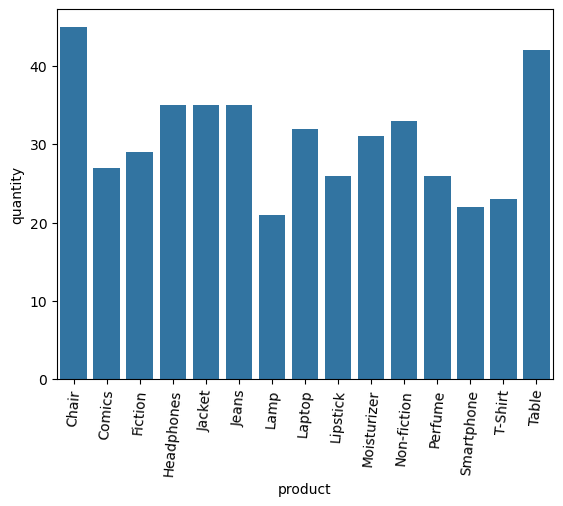

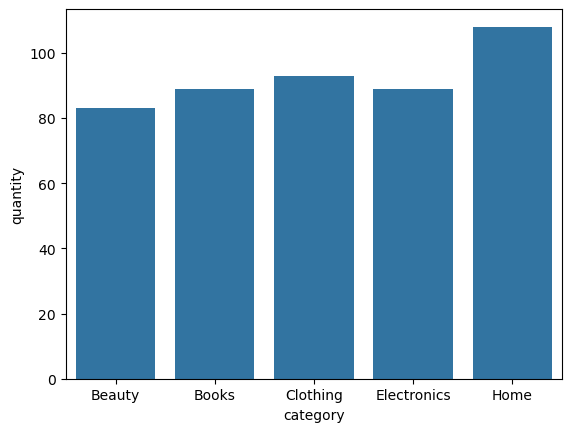

In [15]:
products = df.groupby('product')['quantity'].sum().reset_index()
sns.barplot(x='product', y='quantity', data=products)
plt.xticks(rotation=85)
plt.show()

category = df.groupby('category')['quantity'].sum().reset_index()
sns.barplot(x='category', y='quantity', data=category)
plt.show()

**Chair is the highest selling product,while table being the second highest and the lamp is the lowest selling product.** 

**The highest selling category is home, while the lowest is beauty.**

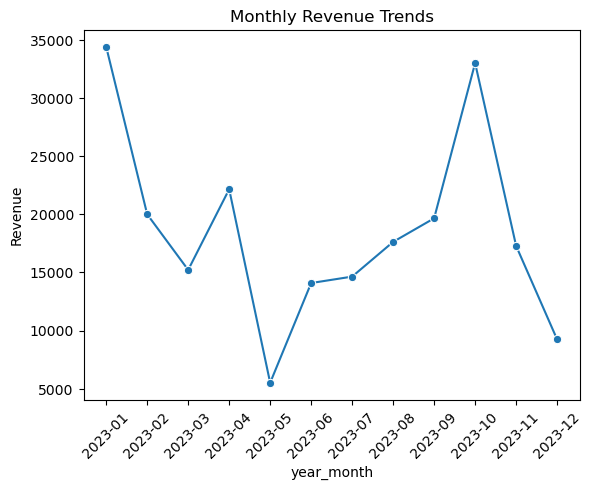

In [16]:
df['year_month'] = df['order_date'].dt.to_period('M')
monthly_revenue = df.groupby('year_month')['total_sales'].sum().reset_index()
monthly_revenue['year_month'] = monthly_revenue['year_month'].astype(str)

sns.lineplot(x='year_month', y='total_sales', data=monthly_revenue, marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Revenue Trends')
plt.ylabel('Revenue')
plt.show()


**The revenue generated is highest in January and October with May generating the lowest revenue generating month.**

**So, we can tell that people buy more during Diwali and New Year.**

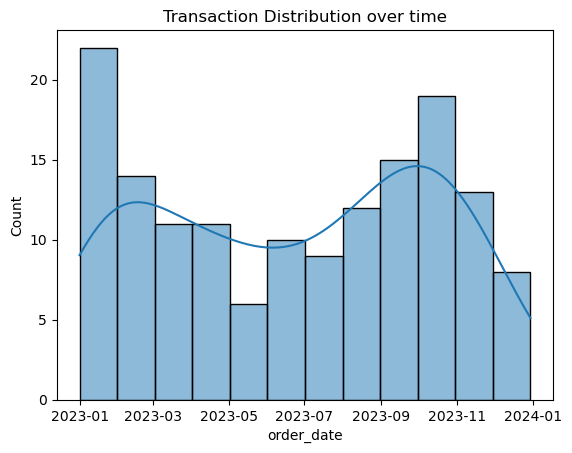

In [17]:
sorted_df = df.sort_values('order_date')
sns.histplot(data = sorted_df,x='order_date',kde = True,bins = 12)
plt.title('Transaction Distribution over time')
plt.show()

**The distribution confirms the insight of monthly revenue trends.**

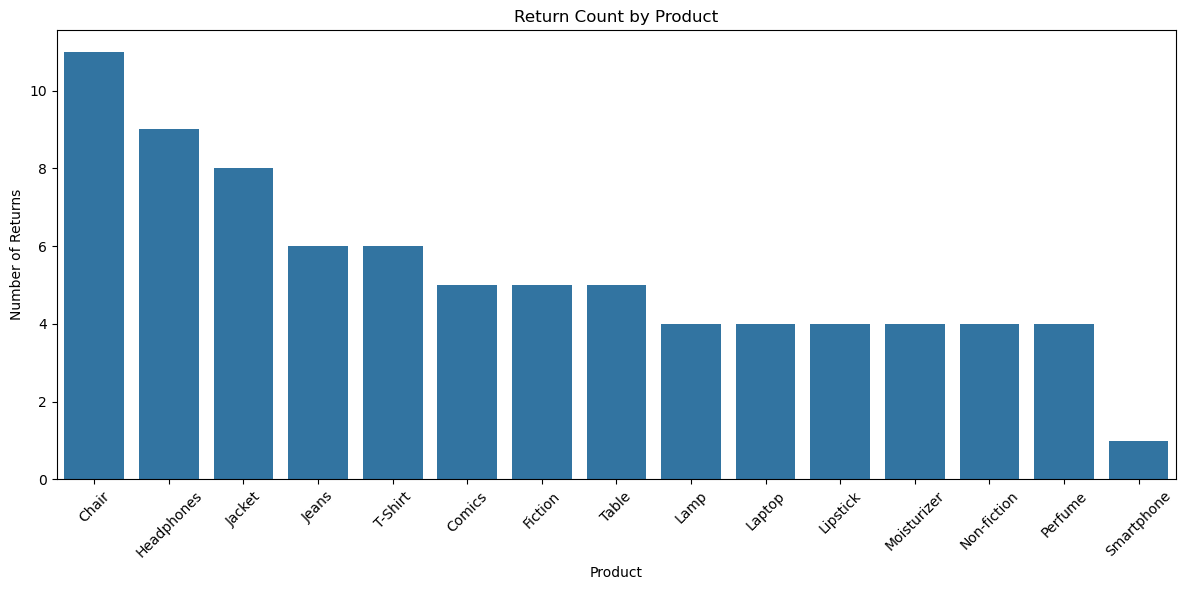

In [25]:
returned_df = df[df['status'] == 'Returned']

return_counts = returned_df.groupby('product').size().reset_index(name='return_count')

return_counts = return_counts.sort_values(by='return_count', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='product', y='return_count', data=return_counts)
plt.title('Return Count by Product')
plt.xlabel('Product')
plt.ylabel('Number of Returns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**The chair is highest returned item, while smartphone being the lowest.**

In [19]:
import pandas as pd
from scipy.stats import ttest_ind

df['total_sales'] = df['price'] * df['quantity']
df['weekday_num'] = df['order_date'].dt.weekday
df['day_type'] = df['weekday_num'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

weekday_sales = df[df['day_type'] == 'Weekday']['total_sales']
weekend_sales = df[df['day_type'] == 'Weekend']['total_sales']

t_stat, p_value = ttest_ind(weekday_sales, weekend_sales, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Significant difference in average sales between weekdays and weekends.")
else:
    print("No significant difference in average sales between weekdays and weekends.")


T-statistic: -1.6567
P-value: 0.1005
No significant difference in average sales between weekdays and weekends.


In [20]:
import pandas as pd
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['payment_method'], df['status'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")

if p < 0.05:
    print("There is a significant association between payment method and order status.")
else:
    print("No significant association between payment method and order status.")


Chi-Square Statistic: 11.7742
P-value: 0.0191
Degrees of Freedom: 4
There is a significant association between payment method and order status.


In [21]:
import pandas as pd
from scipy.stats import f_oneway

df['total_sales'] = df['price'] * df['quantity']

groups = [group['total_sales'].values for name, group in df.groupby('category')]
f_stat, p_value = f_oneway(*groups)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Significant difference in mean sales across product categories.")
else:
    print("No significant difference in mean sales across product categories.")


F-statistic: 1.7120
P-value: 0.1505
No significant difference in mean sales across product categories.
